In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# # Create an engine that opens the notebook up to the database
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model using automap_base()

Base = automap_base()

# reflect the tables with Base.prepare(), passing in the engine and reflect=True
Base.prepare(engine, reflect=True)

In [7]:
# view all of the classes that automap found with Base.classes
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# column names and types in measurement
inspection = inspect(engine)
columns = inspection.get_columns("measurement")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# column names and types in station
inspection = inspect(engine)
columns = inspection.get_columns("station")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our Session() and bind it to the engine
session = Session(engine)

# Exploratory Climate Analysis

##### Design a query to retrieve the last 12 months of precipitation data

In [12]:
# Calculate the date 1 year ago from the last data point in the database
last_record_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_record_date

('2017-08-23')

In [13]:
# Use the datetime.timedelta() function to help calculating the difference of one year, 12 months, or 365 days
prev_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('Find Date:', prev_year_date)
print("           ==========")

Find Date: 2016-08-23


In [14]:
# Use session.query() to retrieve the date and prcp columns, .filter() by the date you calculated above, and selecting .all() results

prcp_data = (session.query(Measurement.date,func.max(Measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',Measurement.date) >= prev_year_date)
                  .group_by(Measurement.date)
                  .all())
prcp_data

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

In [15]:
# Save the query results as a Pandas DataFrame() and set the index to the date column

precipitation_df = pd.DataFrame(prcp_data, columns=['date', 'prcp']).dropna()

precipitation_df

,date,prcp
0,2016-08-23,1.79
1,2016-08-24,2.28
2,2016-08-25,0.21
3,2016-08-26,0.04
4,2016-08-27,0.18
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.56
364,2017-08-22,0.50


In [16]:
# Sort the dataframe by date

prcp_df = precipitation_df.sort_values("date").set_index("date")
prcp_df

,prcp
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


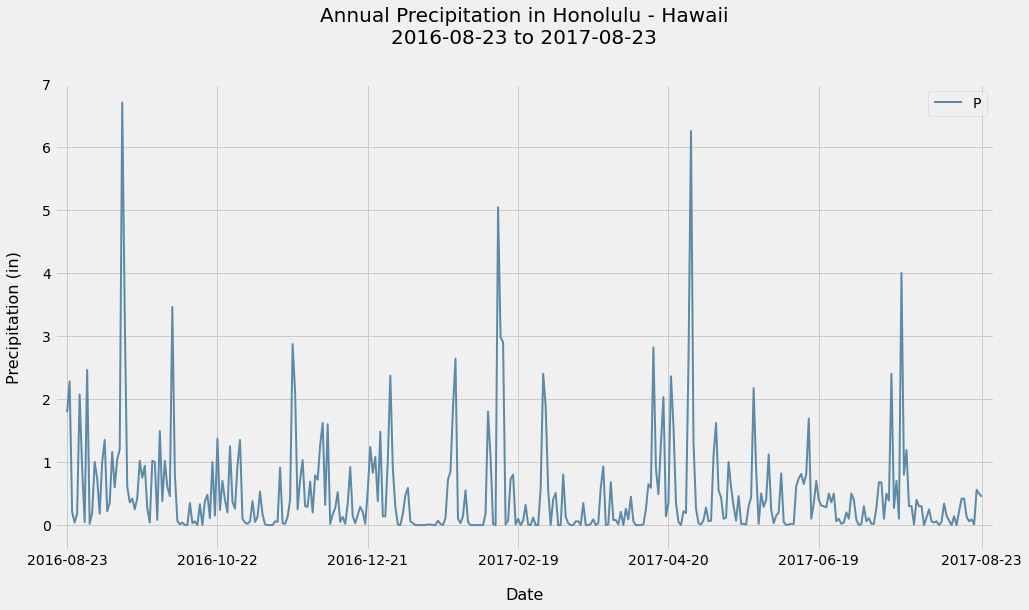

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(15,8)
prcp_df.plot(linewidth=2,alpha=1,rot=0, 
             xticks=(0,60,120,180,240,300,365),
             color='#5d8aa8')

plt.xlim(-5,370)
plt.ylim(-0.4,7)
plt.yticks(size=14)
plt.xticks(fontsize=14)
plt.legend("Precipitation")
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation (in)',fontsize=16,color='black',labelpad=20)
plt.title('Annual Precipitation in Honolulu - Hawaii\n2016-08-23 to 2017-08-23',fontsize=20,pad=40)
plt.savefig("Images/precipitation.png")
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()
plt.savefig("Images/describe.png")

<Figure size 1080x576 with 0 Axes>

##### Design a query to show how many stations are available in this dataset


In [19]:
num_of_stations = session.query(Measurement.station).distinct().count()
print(f"A total of {num_of_stations} stations in this dataset")

A total of 9 stations in this dataset


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order. Hint: session.query() the station column in the Station table
stations_data = pd.DataFrame(session.query(Measurement.station, func.count(Measurement.station).label('count')).\
                                  group_by(Measurement.station).\
                                  order_by(func.count(Measurement.station).desc()).all())
stations_data

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
act_station = [Measurement.station,
               func.min(Measurement.tobs),
               func.max(Measurement.tobs),
               func.avg(Measurement.tobs)]
                
act_station_data = session.query(*act_station).filter(Measurement.station=='USC00519281').all()


In [22]:
act_station_df = pd.DataFrame(act_station_data, columns=['station', 'min_temp', 'max_temp', 'avg_temp'])

act_station_df

,station,min_temp,max_temp,avg_temp
0,USC00519281,54.0,85.0,71.663781


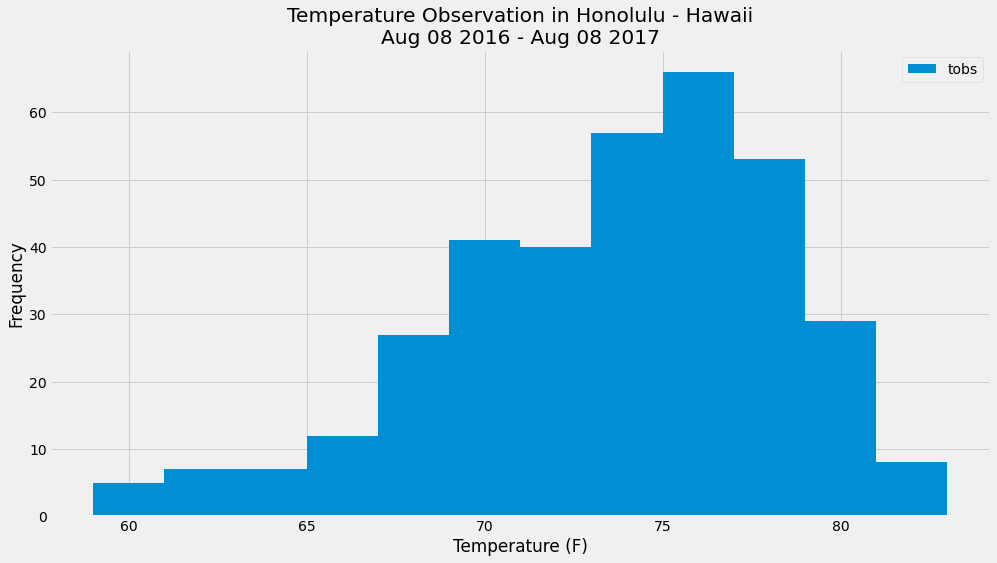

<Figure size 1080x576 with 0 Axes>

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_temp_act_station = session.query(Measurement.tobs).\
                                filter(Measurement.station=="USC00519281").\
                                filter(Measurement.date >= prev_year_date).\
                                order_by(Measurement.date.desc()).all()

x = [x[0] for x in most_temp_act_station]


plt.hist(x, bins=12)
plt.title('Temperature Observation in Honolulu - Hawaii\nAug 08 2016 - Aug 08 2017')
plt.ylabel('Frequency')
plt.xlabel('Temperature (F)')
plt.legend(['tobs'])
plt.show()
plt.savefig("Images/station-Histogram.png")


In [24]:
## Bonus Challenge Assignment

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return (session.query(func.min(Measurement.tobs), 
                         func.avg(Measurement.tobs), 
                         func.max(Measurement.tobs))
                    .filter(Measurement.date >= start_date)
                    .filter(Measurement.date <= end_date)
                    .all())


print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_data = calc_temps('2017-01-10', '2017-01-20')
temps_df = pd.DataFrame({"start_date" : '2017-01-10',
                         "end_date" : '2017-01-20',
                         "min_temp": [temp_data[0][0]],
                         "avg_temp": [temp_data[0][1]],
                         'max_temp': [temp_data[0][2]]})

temps_df


,start_date,end_date,min_temp,avg_temp,max_temp
0,2017-01-10,2017-01-20,62.0,70.514706,81.0


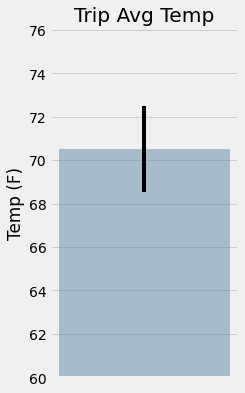

<Figure size 1080x576 with 0 Axes>

In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
lower = temp_data[0][1] - temp_data[0][0]
upper = temp_data[0][2] - temp_data[0][1]

plt.figure(figsize=(3,6))
plt.bar(0, temp_data[0][1], yerr=[upper-lower], color='#5d8aa8', alpha=0.5)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(60)

plt.show()
plt.savefig("Images/temps-bar-chart.png")

In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2017-06-05'
end_date = '2017-06-15'
def rainfall(start_date, end_date):
    return session.query(Measurement.station, 
                         Station.name,
                         Measurement.prcp,
                         Station.latitude,
                         Station.longitude,
                         Station.elevation).\
                            group_by(Measurement.station).\
                            join(Station, Measurement.station == Station.station).\
                            filter(Measurement.date >= start_date).\
                            filter(Measurement.date <= end_date).\
                            order_by(Measurement.prcp).all()

rainfall_data = rainfall(start_date, end_date)

rainfall_df = pd.DataFrame(rainfall_data,
                          columns=["station", "name", "total_prcp","logitude", "latitude", "elevation"])
rainfall_df.dropna()
# plt.savefig("Images/rainfall-df.png")

,station,name,total_prcp,logitude,latitude,elevation
1,USC00513117,"KANEOHE 838.1, HI US",0.00,21.42340,-157.80150,14.6
2,USC00519397,"WAIKIKI 717.2, HI US",0.00,21.27160,-157.81680,3.0
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.00,21.33556,-157.71139,19.5
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",0.01,21.33310,-157.80250,152.4
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.02,21.52130,-157.83740,7.0
6,USC00519281,"WAIHEE 837.5, HI US",0.05,21.45167,-157.84889,32.9


In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    return (session.query(func.min(Measurement.tobs), 
                          func.avg(Measurement.tobs), 
                          func.max(Measurement.tobs))
                   .filter(func.strftime("%m-%d", Measurement.date) == date)
                   .all())
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [50]:
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2019-06-05'
end_date = '2019-06-15'

# return start date as an int of month and day, without year
trip_start = int(start_date[-2:])
trip_end = int(end_date[-2:])

# obtain total number of days for trip, including last day of trip
num_of_days = trip_end - trip_start + 1

# Use the start and end date to create a range of dates

start_date = dt.datetime.strptime(start_date, "%Y-%m-%d")

# Stip off the year and save a list of %m-%d strings

dates = [dt.datetime.strftime(start_date + dt.timedelta(days = x), "%m-%d")

# Loop through the list of %m-%d strings and calculate the normals for each date
        for x in range(0, num_of_days)]


# calculate the daily normals for your trip

normals = [daily_normals(date) for date in dates]

normals

[[(68.0, 74.85454545454546, 81.0)],
 [(70.0, 75.17543859649123, 80.0)],
 [(68.0, 75.07142857142857, 81.0)],
 [(70.0, 75.58620689655173, 81.0)],
 [(69.0, 75.15254237288136, 81.0)],
 [(68.0, 75.14285714285714, 81.0)],
 [(69.0, 76.01960784313725, 84.0)],
 [(66.0, 75.66666666666667, 83.0)],
 [(68.0, 75.66666666666667, 81.0)],
 [(69.0, 75.62711864406779, 81.0)],
 [(67.0, 75.40350877192982, 81.0)]]

In [51]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

# unpack the list of lists
normals = [normal[0] for normal in normals]

normals_data = pd.DataFrame(normals, columns=["min_temp", "avg_temp", "max_temp"])
#normals_df

# add a new column with name date and set the elements to the list of dates saved in a variable called dates
normals_data["Date"] = dates


normals_df

,min_temp,avg_temp,max_temp
Date,,,
06-05,68.0,74.854545,81.0
06-06,70.0,75.175439,80.0
06-07,68.0,75.071429,81.0
06-08,70.0,75.586207,81.0
06-09,69.0,75.152542,81.0
06-10,68.0,75.142857,81.0
06-11,69.0,76.019608,84.0
06-12,66.0,75.666667,83.0
06-13,68.0,75.666667,81.0


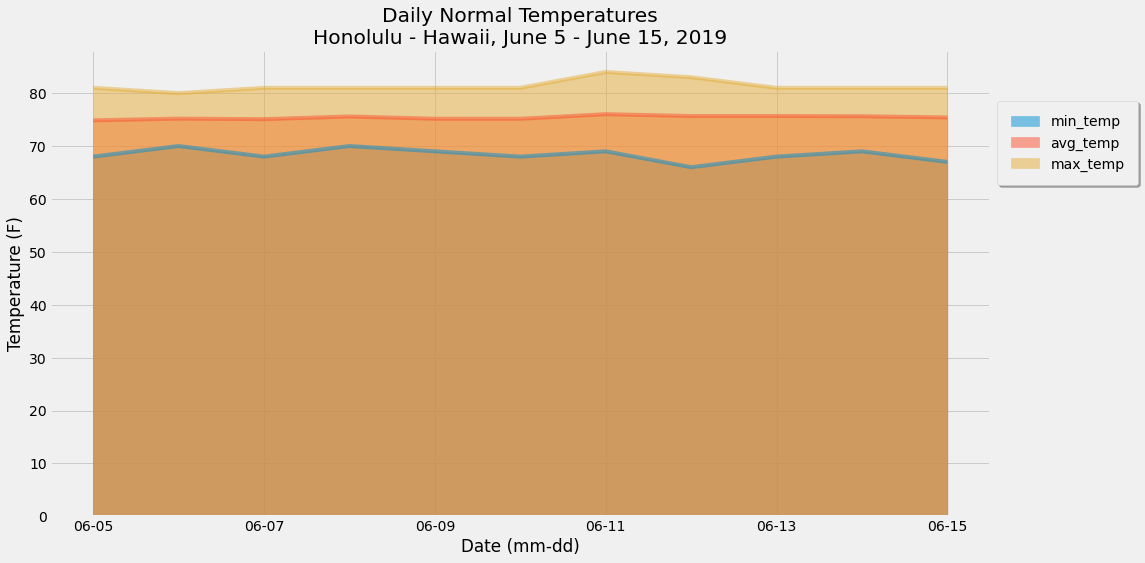

In [32]:
# Plot the daily normals as an area plot with `stacked=False`

normals_df.plot.area(stacked=False, alpha=0.5)
plt.xlabel("Date (mm-dd)")
plt.ylabel("Temperature (F)")
plt.title("Daily Normal Temperatures\nHonolulu - Hawaii, June 5 - June 15, 2019")
plt.gca().legend(loc="center left", bbox_to_anchor=(1.0, 0.8), shadow=True, borderpad=1);
plt.savefig("Images/daily_normal_temps.png")